# New Section

**Importing and visualising some data**

data loaded successfully 
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


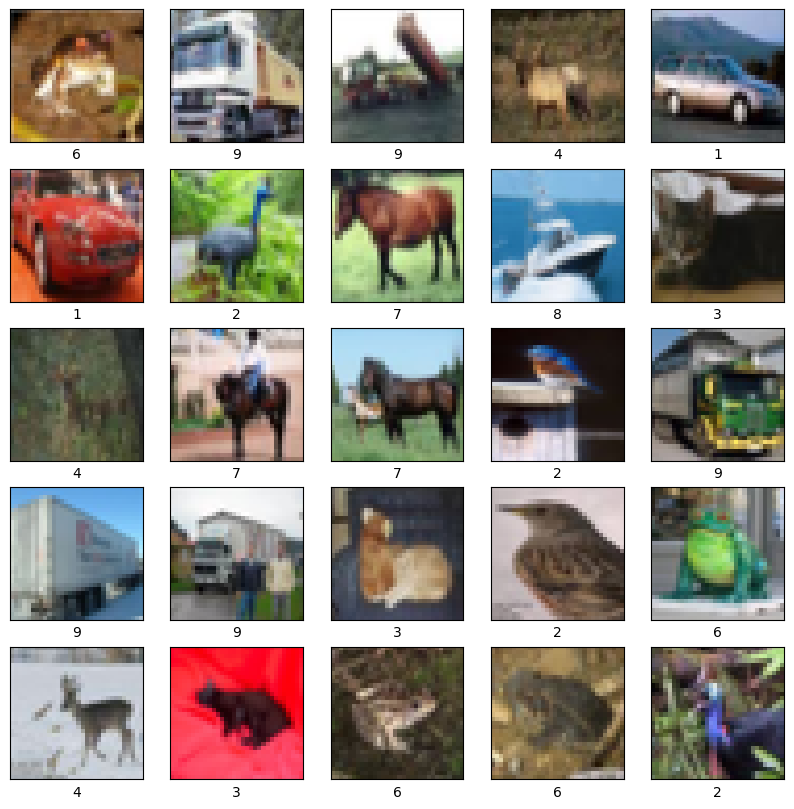

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Load CIFAR-10 dataset
(x_training, y_training), (x_testing, y_testing) = tf.keras.datasets.cifar10.load_data()
print("data loaded successfully ")
import matplotlib.pyplot as plt

# Printing some of the  loaded data
print("x_train shape:", x_training.shape)
print("y_train shape:", y_training.shape)

# Displaying some images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_training[i], cmap=plt.cm.binary)
    plt.xlabel(y_training[i][0])
plt.show()


**Using Libraries**

In [ ]:
import tensorflow as tf  # Import TensorFlow library
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier as Classifier  # Import DecisionTreeClassifier class
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score and classification_report functions
from sklearn.decomposition import PCA as PrincipalComponentAnalysis  # Import PCA class
import pickle  # Import pickle module for saving the model

(x_training, y_training), (x_testing, y_testing) = tf.keras.datasets.cifar10.load_data()  # Load CIFAR-10 dataset
print("Data loaded")  # Print message indicating data loading is complete

X_training = x_training.reshape(x_training.shape[0], -1)  # Reshape training data to 2D array
X_testing = x_testing.reshape(x_testing.shape[0], -1)  # Reshape test data to 2D array
y_training = y_training.ravel()  # Flatten training labels
y_testing = y_testing.ravel()  # Flatten test labels

X_training = X_training / 255.0  # Normalize training data
X_testing = X_testing / 255.0  # Normalize test data

pca = PrincipalComponentAnalysis(n_components=0.95)  # Initialize PCA with desired explained variance
X_training_pca = pca.fit_transform(X_training)  # Fit and transform training data using PCA
X_testing_pca = pca.transform(X_testing)  # Transform test data using PCA

clf = Classifier()  # Initialize Decision Tree Classifier
clf.fit(X_training_pca, y_training)  # Train Decision Tree Classifier using PCA-transformed training data

y_prediction = clf.predict(X_testing_pca)  # Predict labels for test data
accuracy = accuracy_score(y_testing, y_prediction)  # Calculate accuracy
report = classification_report(y_testing, y_prediction)  # Generate classification report
print("Accuracy:", accuracy)  # Print accuracy
print("Classification Report:")  # Print classification report
print(report)

with open('decision_tree_model_with_pca.pkl', 'wb') as file:  # Save trained model to a file
    pickle.dump((clf, pca), file)  # Serialize model and PCA object into the file


170498071/170498071 [==============================] - 5s 0us/step
Data loaded
Accuracy: 0.2602
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.36      0.35      1000
           1       0.33      0.31      0.32      1000
           2       0.19      0.20      0.19      1000
           3       0.19      0.18      0.18      1000
           4       0.22      0.23      0.23      1000
           5       0.22      0.22      0.22      1000
           6       0.24      0.26      0.25      1000
           7       0.24      0.22      0.23      1000
           8       0.35      0.35      0.35      1000
           9       0.29      0.27      0.28      1000

    accuracy                           0.26     10000
   macro avg       0.26      0.26      0.26     10000
weighted avg       0.26      0.26      0.26     10000



**Without using Decision tree library**

Data loaded
Number of components obtained from PCA: 217


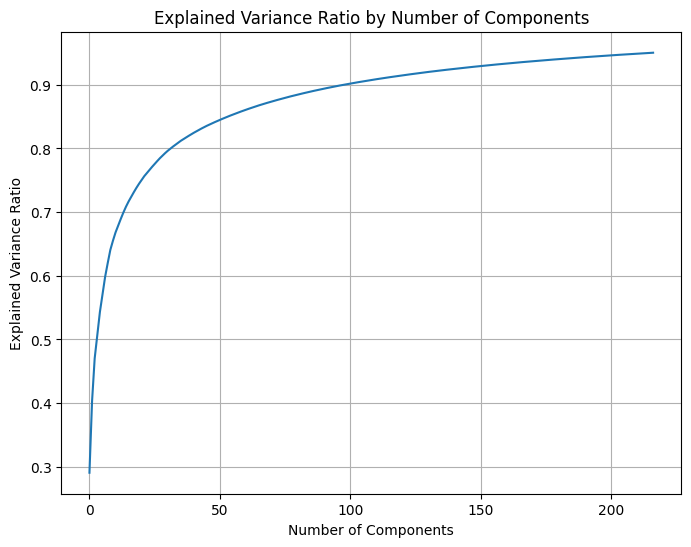

Accuracy (Scratch): 0.2552
Classification Report (Scratch):
              precision    recall  f1-score   support

           0       0.39      0.37      0.38      1000
           1       0.29      0.24      0.26      1000
           2       0.16      0.14      0.15      1000
           3       0.15      0.07      0.09      1000
           4       0.33      0.20      0.25      1000
           5       0.34      0.18      0.23      1000
           6       0.15      0.55      0.24      1000
           7       0.39      0.06      0.11      1000
           8       0.41      0.36      0.38      1000
           9       0.34      0.39      0.36      1000

    accuracy                           0.26     10000
   macro avg       0.29      0.26      0.25     10000
weighted avg       0.29      0.26      0.25     10000



In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # This is used for leaf nodes

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.num_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.num_classes)]  # Count samples per class
        predicted_class = np.argmax(num_samples_per_class)

        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return Node(value=predicted_class)

        feature_indices = np.random.choice(self.num_features, self.num_features, replace=False)
        best_feature, best_threshold = self._find_best_split(X, y, feature_indices, num_samples_per_class)
        left_indices, right_indices = self._split_data(X[:, best_feature], best_threshold)

        left_subtree = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)

        return Node(feature_index=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def _find_best_split(self, X, y, feature_indices, num_samples_per_class):
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in feature_indices:
            thresholds, classes = zip(*sorted(zip(X[:, feature_index], y)))
            num_left = [0] * self.num_classes
            num_right = num_samples_per_class.copy()

            for i in range(1, len(y)):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.num_classes))
                gini_right = 1.0 - sum((num_right[x] / (len(y) - i)) ** 2 for x in range(self.num_classes))
                gini = (i * gini_left + (len(y) - i) * gini_right) / len(y)

                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

        return best_feature, best_threshold

    def _split_data(self, feature_values, threshold):
        left_indices = np.where(feature_values <= threshold)[0]
        right_indices = np.where(feature_values > threshold)[0]
        return left_indices, right_indices

    def predict(self, X):
        return [self._predict_single(x, self.tree) for x in X]

    def _predict_single(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Data loaded")

# Reshape the data to 2D array
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)
y_train = y_train.ravel()
y_test = y_test.ravel()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Perform PCA
pca = PCA(n_components=0.95)  # Choose the number of components to explain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the value of n_components obtained
print("Number of components obtained from PCA:", pca.n_components_)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

# Split the data into train and test sets
# Assuming X_train_pca, y_train, X_test_pca, and y_test are defined

# Define and train decision tree classifier
clf_scratch = DecisionTreeClassifier(max_depth=5)
clf_scratch.fit(X_train_pca, y_train)

# Evaluate decision tree classifier
y_pred_scratch = clf_scratch.predict(X_test_pca)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
report_scratch = classification_report(y_test, y_pred_scratch)
print("Accuracy (Scratch):", accuracy_scratch)
print("Classification Report (Scratch):")
print(report_scratch)


**Without using decision tree and pca library**

Data loaded
Number of components obtained from PCA: 217


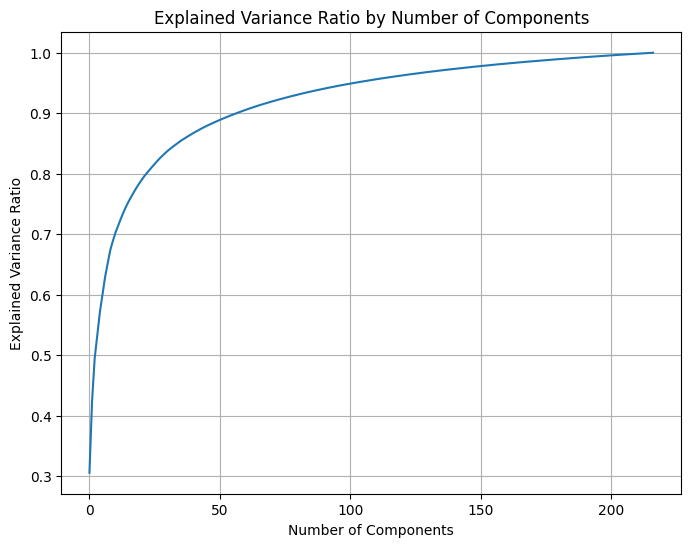

Accuracy (Scratch): 0.2552
Classification Report (Scratch):
              precision    recall  f1-score   support

           0       0.39      0.37      0.38      1000
           1       0.29      0.24      0.26      1000
           2       0.16      0.14      0.15      1000
           3       0.15      0.07      0.09      1000
           4       0.33      0.20      0.25      1000
           5       0.34      0.18      0.23      1000
           6       0.15      0.55      0.24      1000
           7       0.39      0.06      0.11      1000
           8       0.41      0.36      0.38      1000
           9       0.34      0.39      0.36      1000

    accuracy                           0.26     10000
   macro avg       0.29      0.26      0.25     10000
weighted avg       0.29      0.26      0.25     10000



In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to split on
        self.threshold = threshold  # Threshold value for the split
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value if the node is a leaf (class label)

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth  # Maximum depth of the decision tree

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))  # Number of unique classes
        self.num_features = X.shape[1]  # Number of features
        self.tree = self._grow_tree(X, y)  # Grow the decision tree

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.num_classes)]  # Count samples per class
        predicted_class = np.argmax(num_samples_per_class)  # Predicted class based on majority vote

        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return Node(value=predicted_class)  # If only one class or reached max depth, create leaf node

        feature_indices = np.random.choice(self.num_features, self.num_features, replace=False)  # Randomly select feature indices
        best_feature, best_threshold = self._find_best_split(X, y, feature_indices, num_samples_per_class)  # Find best split
        left_indices, right_indices = self._split_data(X[:, best_feature], best_threshold)  # Split data

        left_subtree = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)  # Grow left subtree recursively
        right_subtree = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)  # Grow right subtree recursively

        return Node(feature_index=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def _find_best_split(self, X, y, feature_indices, num_samples_per_class):
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in feature_indices:
            thresholds, classes = zip(*sorted(zip(X[:, feature_index], y)))  # Sort feature values and corresponding class labels
            num_left = [0] * self.num_classes  # Initialize counts for left child
            num_right = num_samples_per_class.copy()  # Initialize counts for right child

            for i in range(1, len(y)):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.num_classes))
                gini_right = 1.0 - sum((num_right[x] / (len(y) - i)) ** 2 for x in range(self.num_classes))
                gini = (i * gini_left + (len(y) - i) * gini_right) / len(y)

                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

        return best_feature, best_threshold

    def _split_data(self, feature_values, threshold):
        left_indices = np.where(feature_values <= threshold)[0]  # Indices of samples with feature values less than or equal to threshold
        right_indices = np.where(feature_values > threshold)[0]  # Indices of samples with feature values greater than threshold
        return left_indices, right_indices

    def predict(self, X):
        return [self._predict_single(x, self.tree) for x in X]

    def _predict_single(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self._predict_single(x, node.left)  # Recursively traverse left subtree
        else:
            return self._predict_single(x, node.right)  # Recursively traverse right subtree

class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components  # Number of principal components
        self.components = None  # Principal components
        self.mean = None  # Mean of the data

    def fit(self, X):
        self.mean = np.mean(X, axis=0)  # Compute mean of the data
        X_centered = X - self.mean  # Center the data
        covariance_matrix = np.cov(X_centered, rowvar=False)  # Compute covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # Perform eigen decomposition
        idx = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
        eigenvectors = eigenvectors[:, idx]  # Reorder eigenvectors
        eigenvalues = eigenvalues[idx]  # Reorder eigenvalues
        if self.n_components is not None:
            self.components = eigenvectors[:, :self.n_components]  # Select top n_components eigenvectors
        else:
            self.components = eigenvectors

    def transform(self, X):
        X_centered = X - self.mean  # Center the data
        return np.dot(X_centered, self.components)  # Project data onto principal components

(x_training, y_training), (x_testing, y_testing) = tf.keras.datasets.cifar10.load_data()  # Load CIFAR-10 dataset
print("Data loaded successfully")

X_training = x_training.reshape(x_training.shape[0], -1)  # Reshape training data
X_testing = x_testing.reshape(x_testing.shape[0], -1)  # Reshape test data
y_training = y_training.ravel()  # Flatten training labels
y_testing = y_testing.ravel()  # Flatten test labels

X_training = X_training / 255.0  # Normalize training data
X_testing = X_testing / 255.0  # Normalize test data

pca = PCA(n_components=217)  # Initialize PCA with desired number of components
pca.fit(X_training)  # Fit PCA to training data
X_training_pca = pca.transform(X_training)  # Transform training data
X_testing_pca = pca.transform(X_testing)  # Transform test data

print("Number of components obtained from PCA:", pca.components.shape[1])  # Print number of components obtained

plt.figure(figsize=(8, 6))  # Create a new figure
plt.plot(np.cumsum(np.var(X_training_pca, axis=0) / np.sum(np.var(X_training_pca, axis=0))))  # Plot explained variance ratio
plt.xlabel('Number of Components')  # Set x-axis label
plt.ylabel('Explained Variance Ratio')  # Set y-axis label
plt.title('Explained Variance Ratio by Number of Components')  # Set title
plt.grid(True)  # Enable grid
plt.show()  # Show plot

clf_scratch = DecisionTreeClassifier(max_depth=5)  # Initialize decision tree classifier
clf_scratch.fit(X_training_pca, y_training)  # Train decision tree classifier

y_prediction_scratch = clf_scratch.predict(X_testing_pca)  # Predict labels for test data
accuracy_scratch = accuracy_score(y_testing, y_prediction_scratch)  # Compute accuracy
report_scratch = classification_report(y_testing, y_prediction_scratch)  # Generate classification report
print("from this i got Accuracy (Scratch):", accuracy_scratch)  # Print accuracy
print("Classification Report (Scratch):")  # Print classification report
print(report_scratch)


**Trying to improve accuracy by using Best Hyperparameters**

In [ ]:
# Importing necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Fetching the CIFAR-10 dataset
cifar_10 = fetch_openml('CIFAR_10', version=1, as_frame=False)

# Preprocessing the data
X_data = cifar_10.data / 255.0  # Scaling the pixel values to the range [0, 1]
y_target = cifar_10.target.astype(int)  # Converting target labels to integers

# Defining the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Splitting the data into training and testing sets
X_traini, X_testi, y_traini, y_testi = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Performing Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_traini, y_traini)

# Printing the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best estimator from the grid search
best_dt_classifier = grid_search.best_estimator_

# Making predictions on the test set
y_predicted = best_dt_classifier.predict(X_test)

# Calculating and printing the accuracy score
accuracy_result = accuracy_score(y_testi, y_predicted)
print("from this i got Accuracy:", accuracy_result)

# Generating and printing the classification report
report_result = classification_report(y_testi, y_predicted)
print("Classification Report i got :")
print(report_result)
